In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.head()

/opt/anaconda3/envs/python_data_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [100]:
df_da_de = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "Germany")].copy()
df_da_de = df_da_de.dropna(subset="salary_year_avg")
df_da_de.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 20066 to 781105
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        48 non-null     object        
 1   job_title              48 non-null     object        
 2   job_location           48 non-null     object        
 3   job_via                48 non-null     object        
 4   job_schedule_type      48 non-null     object        
 5   job_work_from_home     48 non-null     bool          
 6   search_location        48 non-null     object        
 7   job_posted_date        48 non-null     datetime64[ns]
 8   job_no_degree_mention  48 non-null     bool          
 9   job_health_insurance   48 non-null     bool          
 10  job_country            48 non-null     object        
 11  salary_rate            48 non-null     object        
 12  salary_year_avg        48 non-null     float64       
 13  sala

In [101]:
df_da_de_exploded = df_da_de.explode("job_skills")
df_da_de_exploded[["salary_year_avg", "job_skills"]].head()

,salary_year_avg,job_skills
20066,75067.5,r
20066,75067.5,python
20066,75067.5,java
20066,75067.5,c#
20066,75067.5,sql


In [102]:
df_da_de_skills = (
  df_da_de_exploded.groupby("job_skills").aggregate(
    skill_count= ("salary_year_avg", "count"),
    median_salary= ("salary_year_avg", "median")
  )
)
df_da_de_skills

,skill_count,median_salary
job_skills,,
atlassian,1,102500.00
aws,3,100500.00
azure,3,89100.00
bigquery,1,166419.50
c#,2,82083.75
databricks,1,111175.00
elasticsearch,1,111175.00
excel,7,105650.00
flask,1,111175.00


In [103]:
job_count = len(df_da_de)
df_da_de_skills["skill_percent"] = df_da_de_skills["skill_count"] / job_count * 100

In [127]:
df_da_de_skills = df_da_de_skills[df_da_de_skills["skill_percent"] > 5]
df_da_de_skills

,skill_count,median_salary,skill_percent
job_skills,,,
aws,3,100500.0,6.250000
azure,3,89100.0,6.250000
excel,7,105650.0,14.583333
gcp,3,165000.0,6.250000
github,3,199675.0,6.250000
go,4,52014.0,8.333333
looker,5,53014.0,10.416667
matplotlib,3,105650.0,6.250000
pandas,4,108412.5,8.333333


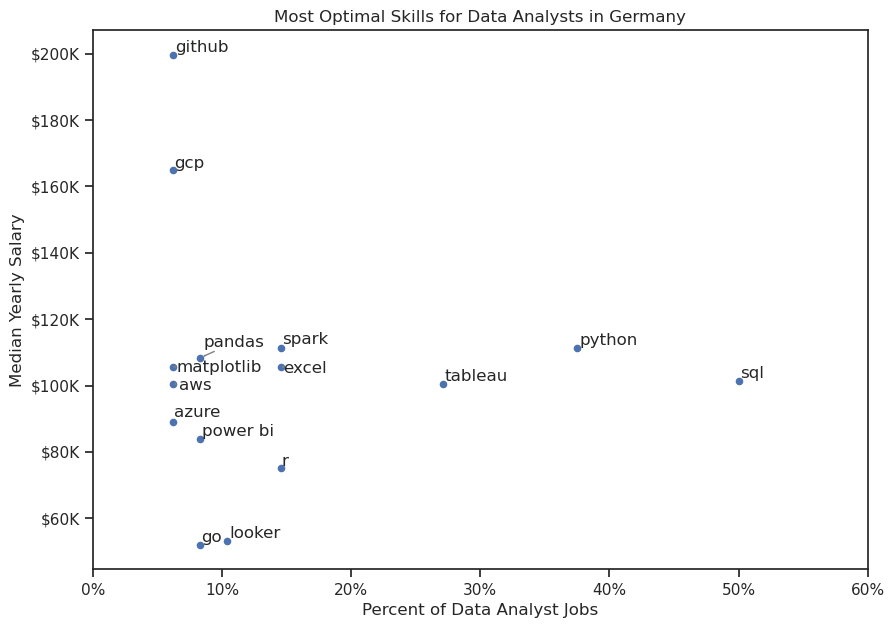

In [151]:
from adjustText import adjust_text

df_da_de_skills.plot(kind="scatter", x="skill_percent", y="median_salary")
plt.title("Most Optimal Skills for Data Analysts in Germany")

texts = []
for i, text in enumerate(df_da_de_skills.index):
  texts.append(plt.text(df_da_de_skills["skill_percent"].iloc[i], df_da_de_skills["median_salary"].iloc[i], text))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.set_xlabel("Percent of Data Analyst Jobs")
ax.set_ylabel("Median Yearly Salary")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.get_figure().set_figheight(7)
ax.get_figure().set_figwidth(10)
ax.set_xlim((0, 60))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray", lw=1))
plt.show()

In [105]:
df_da_de = df_da_de.dropna(subset=["job_skills", "job_type_skills"])
df_da_de

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
20066,Data Analyst,Data Analyst Logistik (w/m/d),"Salzgitter, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-12-20 13:17:42,True,False,Germany,year,75067.5,NaN,PowerCo,"[r, python, java, c#, sql]","{'programming': ['r', 'python', 'java', 'c#', ..."
51100,Data Analyst,(Senior) People Data Analyst (m/w/x),Germany,via Ai-Jobs.net,Full-time,False,Germany,2023-05-15 07:18:25,False,False,Germany,year,111175.0,NaN,Grover,"[excel, power bi]","{'analyst_tools': ['excel', 'power bi']}"
51476,Data Analyst,Head of Data Analytics,"Berlin, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-04-18 06:15:58,False,False,Germany,year,166419.5,NaN,Volt.io,"[sql, python, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
57582,Data Analyst,Application Consultant in Data Integration,"Hamburg, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-01-27 07:02:44,False,False,Germany,year,89100.0,NaN,Vattenfall,"[c#, sql, sql server, azure]","{'cloud': ['azure'], 'databases': ['sql server..."
58368,Data Analyst,Data Manager,"Düsseldorf, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-02-04 07:05:17,True,False,Germany,year,105650.0,NaN,Statkraft,"[python, sql, pandas, numpy, matplotlib]","{'libraries': ['pandas', 'numpy', 'matplotlib'..."
127888,Data Analyst,Data Analyst,"Stuttgart, Germany",via Ai-Jobs.net,Contractor,False,Germany,2023-07-28 08:21:07,False,False,Germany,year,111175.0,NaN,Barbaricum,"[python, javascript, r, sql, go, react, flask]","{'libraries': ['react'], 'programming': ['pyth..."
137735,Data Analyst,Data Manager (m/w/d),"Darmstadt, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-02-23 08:31:28,False,False,Germany,year,105650.0,NaN,Dun & Bradstreet,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
161026,Data Analyst,Research Engineer for Security and Privacy (f...,"Renningen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-04-28 15:15:32,False,False,Germany,year,199675.0,NaN,Bosch Group,"[spark, github]","{'libraries': ['spark'], 'other': ['github']}"
181422,Data Analyst,"Senior Product and Service Owner ""Big Data - K...","Stuttgart, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-04-06 15:16:43,False,False,Germany,year,89100.0,NaN,Bosch Group,"[julia, neo4j, spark, linux]","{'databases': ['neo4j'], 'libraries': ['spark'..."
186919,Data Analyst,Principal Data Analyst - Growth,"Berlin, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-04-24 15:15:33,True,False,Germany,year,111175.0,NaN,SumUp,"[sql, r, python, matlab, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."


In [106]:
type(df_da_de["job_type_skills"].iloc[0])

str

In [129]:
skill_types = {}

for row in df_da_de["job_type_skills"]:
  skill_type = ast.literal_eval(row)
  for key, val in skill_type.items():
    if key in skill_types:
      skill_types[key] += val
    else:
      skill_types[key] = val

for key, val in skill_types.items():
  skill_types[key] = list(set(val))

skill_types


{'programming': ['javascript',
  'sas',
  'nosql',
  'sql',
  'pascal',
  'java',
  'c#',
  'r',
  'julia',
  'python',
  'go',
  'matlab',
  'no-sql'],
 'analyst_tools': ['sas',
  'excel',
  'looker',
  'powerpoint',
  'sheets',
  'sap',
  'tableau',
  'power bi'],
 'cloud': ['azure',
  'oracle',
  'aws',
  'redshift',
  'databricks',
  'bigquery',
  'gcp'],
 'databases': ['neo4j', 'sql server', 'elasticsearch'],
 'libraries': ['pyspark',
  'pandas',
  'spark',
  'matplotlib',
  'react',
  'numpy',
  'kafka'],
 'webframeworks': ['flask'],
 'other': ['terminal', 'atlassian', 'github', 'terraform', 'git'],
 'os': ['linux']}

In [130]:
df_technology = pd.DataFrame(skill_types.items(), columns=["technology", "skills"]).explode("skills")
df_technology

,technology,skills
0,programming,javascript
0,programming,sas
0,programming,nosql
0,programming,sql
0,programming,pascal
0,programming,java
0,programming,c#
0,programming,r
0,programming,julia
0,programming,python


In [131]:
df_plot = df_da_de_skills.merge(df_technology, left_on="job_skills", right_on="skills")
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,3,100500.0,6.250000,cloud,aws
1,3,89100.0,6.250000,cloud,azure
2,7,105650.0,14.583333,analyst_tools,excel
3,3,165000.0,6.250000,cloud,gcp
4,3,199675.0,6.250000,other,github
5,4,52014.0,8.333333,programming,go
6,5,53014.0,10.416667,analyst_tools,looker
7,3,105650.0,6.250000,libraries,matplotlib
8,4,108412.5,8.333333,libraries,pandas
9,4,83937.5,8.333333,analyst_tools,power bi


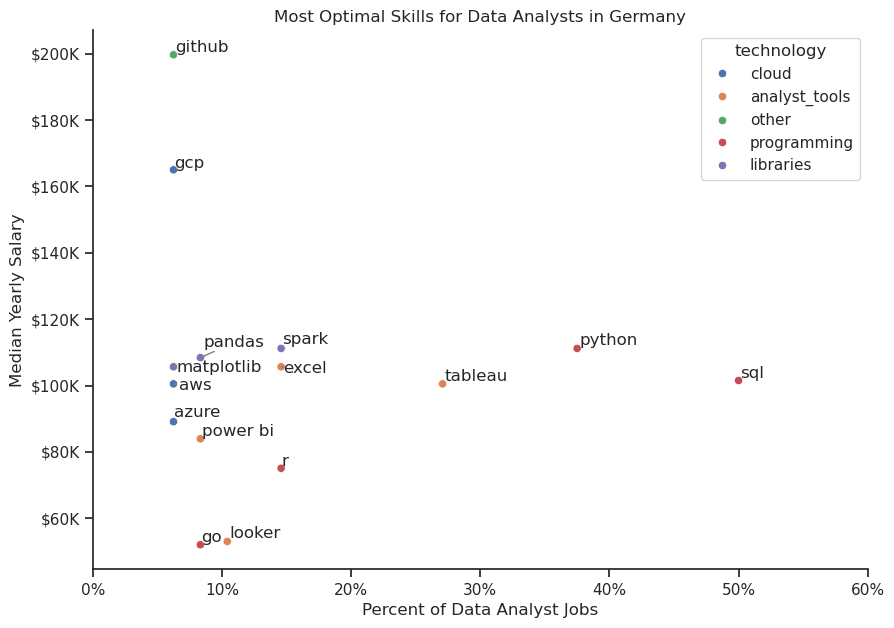

In [ ]:
from adjustText import adjust_text

sns.set_theme(style="ticks")
sns.scatterplot(df_plot, x="skill_percent", y="median_salary", hue="technology")
sns.despine()
plt.title("Most Optimal Skills for Data Analysts in Germany")

texts = []
for i, text in enumerate(df_plot.index):
  texts.append(plt.text(df_plot["skill_percent"].iloc[i], df_plot["median_salary"].iloc[i], df_plot["skills"].iloc[i]))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.set_xlabel("Percent of Data Analyst Jobs")
ax.set_ylabel("Median Yearly Salary")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.get_figure().set_figheight(7)
ax.get_figure().set_figwidth(10)
ax.set_xlim((0, 60))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray", lw=1))
plt.show()